<a href= "https://www.kaggle.com/mnassrib/telecom-churn-datasets">Orange Telecom Churn Dataset (Link to dataset)</a>

<h4>Objective</h4>
To predict if a customer will churn from Orange Telecom Company

<h5>Evaluation Metric</h5>
F1 Score

<b>Variable Definitions</b><br>
<ul>
    <li>State: State customer is located</li>
    <li>Account length: Customer account length in days</li>
    <li>Area code: Area code of customer's location</li>
    <li>Phone number: Customer Phonenumber</li>
    <li>International plan: Does customer have International plan (Yes or No)</li>
    <li>Voicemail plan: Customer has voice mail plan (Yes or No)</li>
    <li>Number vmail messages: Customer number of voice mail messages</li>
    <li>Total day minutes: Total Call time in the daytime</li>
    <li>Total day calls: Total calls in daytime</li>
    <li>Total day charge: Total charges for calls in daytime</li>
    <li>Total eve minutes: Total Call time in the evening </li>
    <li>Total eve calls: Total calls in the evening</li>
    <li>Total eve charge: Total charges for calls in the evening</li>
    <li>Total night minutes: Total Call time at night</li>
    <li>Total night calls: Total calls at night</li>
    <li>Total night charge: Total charges for calls at night</li>
    <li>Total intl minutes: Total intl call time</li>
    <li>Total intl calls: Total Intl calls</li>
    <li>Total intl charge: Total Intl call charges</li>
    <li>Customer service calls: Customer customer service calls</li>
    <li>Churn: Target- Whether customer churned or not(True or False)</li>
</ul>

In [1]:
path = "C:/Machine_learning_datafiles/kaggle"

In [2]:
import os, gc, warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as scipy_stats

In [4]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
seed = 42
random.seed(seed)
np.random.seed(seed)

In [7]:
plt.style.use('bmh')
%matplotlib inline
pd.set_option('display.max_columns', 70)

In [8]:
data= pd.read_csv(path+'./OrangeTelecomCustomerChurn.csv')

In [9]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
data.shape

(3333, 21)

In [11]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [12]:
data.isna().any().sum()
#No Missing Values

0

In [13]:
#renaming the variables
data.columns = data.columns.str.replace('\s', '_')

In [14]:
data.nunique()

state                       51
account_length             212
area_code                    3
phone_number              3333
international_plan           2
voice_mail_plan              2
number_vmail_messages       46
total_day_minutes         1667
total_day_calls            119
total_day_charge          1667
total_eve_minutes         1611
total_eve_calls            123
total_eve_charge          1440
total_night_minutes       1591
total_night_calls          120
total_night_charge         933
total_intl_minutes         162
total_intl_calls            21
total_intl_charge          162
customer_service_calls      10
churn                        2
dtype: int64

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area_code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [16]:
state_churn_rate = data.groupby('state').churn.mean().sort_values(ascending=False)

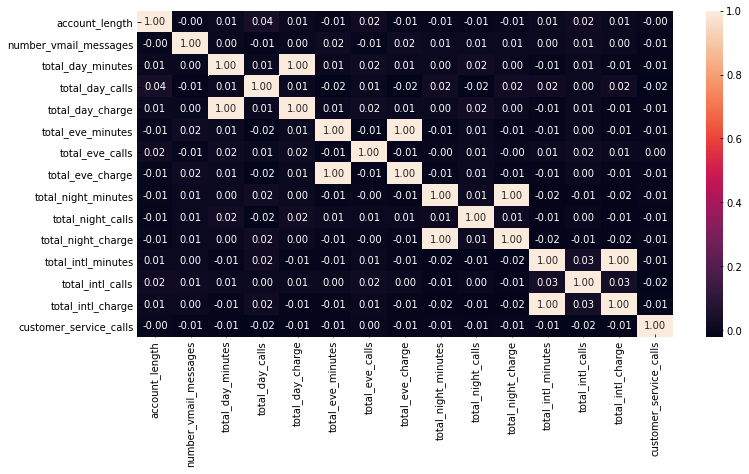

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(data.select_dtypes('number').drop('area_code', 1).corr(), annot=True, fmt='.2f');

In [18]:
data[['international_plan', 'voice_mail_plan']] = data[['international_plan', 'voice_mail_plan']].apply(
    lambda x: [0 if i == 'no' else 1 for i in x])

In [19]:
#has international and voicemail plans
data['intl_voicemail_plan'] = data.international_plan * data.voice_mail_plan 

In [20]:
drop_cols = ['phone_number', 'total_day_minutes', 'total_eve_minutes', 
             'total_night_minutes', 'total_intl_minutes'] #columns to drop

**Correlation Matrix**

In [21]:
corr = data.drop(drop_cols, 1).corr('spearman')

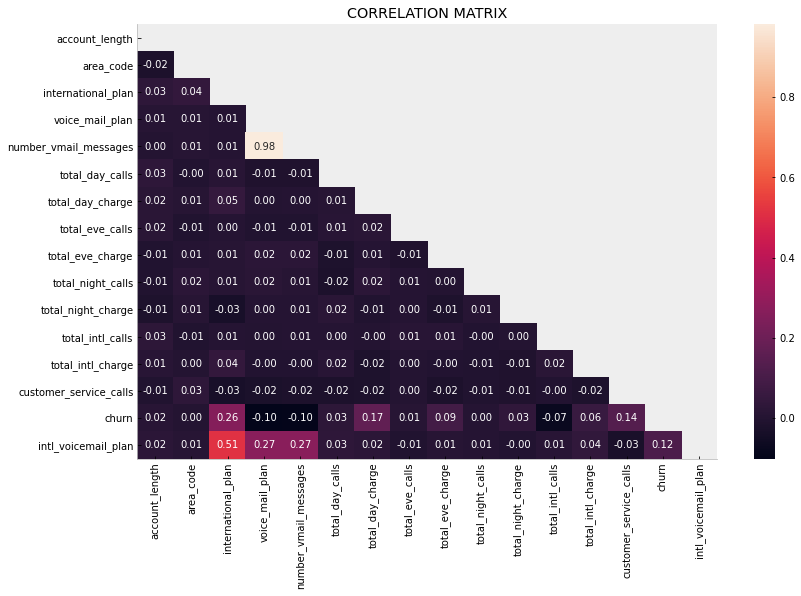

In [22]:
plt.figure(figsize=(13,8))
sns.heatmap(corr, mask=np.triu(corr), fmt='.2f', annot=True)
sns.despine()
plt.title('CORRELATION MATRIX');

There's a strong relationship b/w the number of voicemail messages and if the customer has a voicemail plan or not

**Categorical Encoding**

Because of the high cardinality of the states, I'll represent each state by their churn rates.

In [23]:
def DataTypes(data, type_str='linear'):
    """Creates Data based on the type of model to use- Linear or non-linear model
    :params type_str: Model type
    :returns Data
    """
    cat_cols = ['area_code']
    data_copy = data.copy()
    
    if type_str == 'linear':
        data_copy.state = data.state.map(state_churn_rate)
        data_copy = pd.get_dummies(data_copy, columns=cat_cols, drop_first=True)
        data_copy.churn = data_copy['churn'] * 1
    elif type_str == 'non-linear':
        data_copy.state = data.state.factorize(sort=True)[0]
        data_copy = pd.get_dummies(data_copy, columns=cat_cols, drop_first=False)
        data_copy.churn = data_copy['churn'] * 1
    return data_copy

In [24]:
lin_data = DataTypes(data)
non_lin_data = DataTypes(data, 'non-linear')

**Modelling**

In [25]:
lin_data.shape, non_lin_data.shape

((3333, 23), (3333, 24))

In [26]:
lin_data = lin_data.sample(frac=1, random_state=seed) #shuffling data
non_lin_data = non_lin_data.sample(frac=1, random_state=seed)

In [27]:
X_lin = lin_data.drop(drop_cols+['churn'], 1)
X = non_lin_data.drop(drop_cols+['churn'], 1)
y = lin_data.churn

In [28]:
X.shape, X_lin.shape, len(drop_cols)

((3333, 18), (3333, 17), 5)

In [29]:
xtrain_lin, xtest_lin, ytrain_lin, ytest_lin = train_test_split(X_lin, y, test_size=0.25, random_state=seed, stratify=y)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=seed, stratify=y)

In [30]:
xtrain.shape, xtest.shape, xtrain_lin.shape, xtest_lin.shape

((2499, 18), (834, 18), (2499, 17), (834, 17))

In [31]:
print(ytrain.value_counts())
print(ytest.value_counts())

0    2137
1     362
Name: churn, dtype: int64
0    713
1    121
Name: churn, dtype: int64


In [32]:
scale = ['account_length', 'number_vmail_messages', 'total_day_calls', 'total_day_charge', 'total_eve_calls', 'total_eve_charge', 
         'total_night_calls', 'total_night_charge', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

dont_scale = [col for col in X_lin.columns if col not in scale]

In [33]:
scaler = StandardScaler()
transformer = ColumnTransformer(transformers=[
    ('scale', scaler, scale),
    ('dont_scale', 'passthrough', dont_scale)
], n_jobs=-1, remainder='passthrough')

In [34]:
def metricScores(model, x, y):
    f_score = f1_score(y, model.predict(x))
    auc_score = roc_auc_score(y, model.predict_proba(x)[:,1])
    recall = recall_score(y, model.predict(x))
    precision = precision_score(y, model.predict(x))
    return f_score, auc_score, recall, precision

def printReport(model, x, y):
    print(classification_report(y, model.predict(x),target_names=['Churn_No', 'Churn_Yes']))

def plotFigure(model, x, y, title):
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    plot_confusion_matrix(model, x, y, display_labels=['Churn_No', 'Churn_Yes'], ax=ax[0])
    plot_roc_curve(model, x, y, ax=ax[1],name=title)
    ax[0].grid(False)
    plt.tight_layout(pad=1.)

In [35]:
def featureImportance(model, x, y):
    if hasattr(model, 'named_steps'):
        if 'logreg' in model.named_steps.keys():
            imp = pd.Series(model.named_steps['logreg'].coef_.ravel(), index=x.columns).sort_values()
            imp.plot.barh(title=model.named_steps['logreg'].__class__.__name__)
    else:
        imp= pd.Series(model.feature_importances_, index=x.columns).sort_values()
        imp.plot.barh(title=model.__class__.__name__)

In [36]:
def crossValScores(model, xtr, ytr, cv=5):
    cvs= cross_val_score(model, xtr, ytr, cv=cv, scoring='f1', n_jobs=-1)
    print('Mean F1 Score: {:.3f} +- {:.3f}'.format(cvs.mean(), cvs.std()))

In [37]:
logreg = LogisticRegression(max_iter=500, random_state=seed, class_weight='balanced', solver='liblinear')
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=3, min_samples_split=3, random_state=seed, 
                            criterion='entropy', class_weight='balanced')
gbm = GradientBoostingClassifier(n_estimators=200, random_state=seed, max_features=0.3)

In [38]:
logreg_pl = Pipeline([('transformer', transformer), ('logreg', logreg)])

**Cross validation**<br>
Because the dataset is small I'll be using the sklearn's cross val score which splits a dataset into training and validation sets and stores the evaluation scores at each crossvalidation fold

In [39]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [40]:
crossValScores(logreg_pl, xtrain_lin, ytrain_lin, skfold)

Mean F1 Score: 0.491 +- 0.048


In [41]:
crossValScores(rf, xtrain, ytrain, skfold)

Mean F1 Score: 0.790 +- 0.051


In [42]:
crossValScores(gbm, xtrain, ytrain, skfold)

Mean F1 Score: 0.776 +- 0.062


<hr>

**HyperParameter Tuning**

In [43]:
def GridScores(model, xtr, ytr, params, cv=5, scoring='f1'):
    gcv = GridSearchCV(model, params, scoring=scoring, cv=cv, n_jobs=-1)
    gcv.fit(xtr, ytr)
    return gcv

In [44]:
# logreg_params = {
#     'logreg__C' : [0.1,1,2,3,4,5,10],
# }

In [45]:
# params = {
#     'min_samples_leaf' : [3],
#     'min_samples_split' : [2],
#     'max_features' : [0.5],
#     'n_estimators' : [80,100,120],
#     'max_depth' : [7],
#     'learning_rate' : [0.1]
# }

In [46]:
# gcv = GridScores(gbm, xtrain, ytrain, params, cv=5)

In [47]:
# gcv.best_score_, gcv.best_params_

In [48]:
# gcv.cv_results_['mean_test_score']`

**Optimal Parameters**
<pre>
1. logreg: 0.49173596571079, {'logreg__C': 1}

2. RF: 0.8388747501571816,
 {'max_depth': 10,
  'max_features': 0.6,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 150}

3. GBM: 0.8301466972592577,
 {'max_depth': 7,
  'max_features': 0.5,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 100}
</pre>

<hr>

**Training and Prediction**

In [49]:
logreg = LogisticRegression(max_iter=500, random_state=seed, class_weight='balanced', C=1, solver='liblinear')

rf = RandomForestClassifier(n_estimators=150, min_samples_leaf=2, min_samples_split=2, random_state=seed, 
                            criterion='entropy', class_weight='balanced', max_depth=10, max_features=0.6)

gbm = GradientBoostingClassifier(n_estimators=100, random_state=seed, max_features=0.5, min_samples_leaf=3, 
                                 min_samples_split=2, max_depth=7, learning_rate=0.1)

In [50]:
logreg_pl = Pipeline([('transformer', transformer), ('logreg', logreg)])

<hr>

In [51]:
crossValScores(logreg_pl, xtrain_lin, ytrain_lin, skfold)

Mean F1 Score: 0.491 +- 0.048


In [52]:
crossValScores(rf, xtrain, ytrain, skfold)

Mean F1 Score: 0.815 +- 0.054


In [53]:
crossValScores(gbm, xtrain, ytrain, skfold)

Mean F1 Score: 0.814 +- 0.053


<hr>

In [54]:
def trainModel(model, xtr, ytr, xte, yte):
    model.fit(xtr, ytr)
    fscore,auc_score, recall, precision = metricScores(model, xte, yte)
    scores = pd.DataFrame({'F1':fscore, 'AUC' : auc_score, 'RECALL' : recall, 'PRECISION' : precision}, index=[1])
    return scores

In [55]:
trainModel(logreg_pl, xtrain_lin, ytrain_lin, xtest_lin, ytest_lin)

,F1,AUC,RECALL,PRECISION
1,0.509589,0.820674,0.768595,0.381148


In [56]:
trainModel(rf, xtrain, ytrain, xtest, ytest)

,F1,AUC,RECALL,PRECISION
1,0.846847,0.89896,0.77686,0.930693


In [57]:
trainModel(gbm, xtrain, ytrain, xtest, ytest)

,F1,AUC,RECALL,PRECISION
1,0.833333,0.897048,0.743802,0.947368


**Going by the Evaluation metric (F1), the best model is RandomForest, followed by GradientBoost**

<hr>
<b>Diagnostics</b>

In [58]:
printReport(logreg_pl, xtest_lin, ytest_lin)

              precision    recall  f1-score   support

    Churn_No       0.95      0.79      0.86       713
   Churn_Yes       0.38      0.77      0.51       121

    accuracy                           0.79       834
   macro avg       0.67      0.78      0.69       834
weighted avg       0.87      0.79      0.81       834



In [59]:
printReport(rf, xtest, ytest)

              precision    recall  f1-score   support

    Churn_No       0.96      0.99      0.98       713
   Churn_Yes       0.93      0.78      0.85       121

    accuracy                           0.96       834
   macro avg       0.95      0.88      0.91       834
weighted avg       0.96      0.96      0.96       834



In [60]:
printReport(gbm, xtest, ytest)

              precision    recall  f1-score   support

    Churn_No       0.96      0.99      0.98       713
   Churn_Yes       0.95      0.74      0.83       121

    accuracy                           0.96       834
   macro avg       0.95      0.87      0.90       834
weighted avg       0.96      0.96      0.95       834



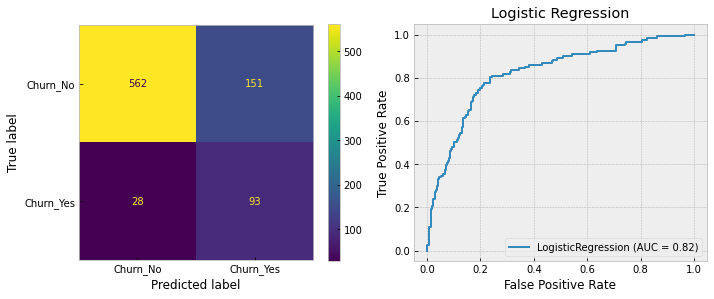

In [61]:
plotFigure(logreg_pl, xtest_lin, ytest_lin, 'LogisticRegression')
plt.title('Logistic Regression');

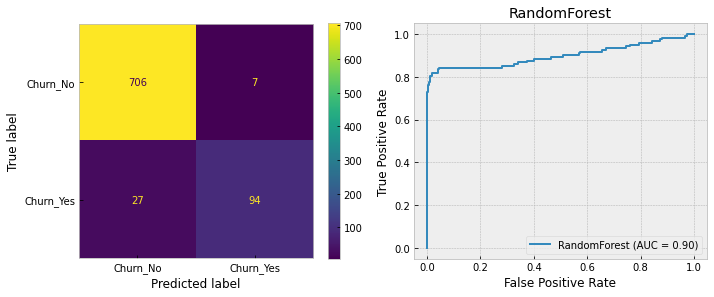

In [62]:
plotFigure(rf, xtest, ytest, 'RandomForest')
plt.title('RandomForest');

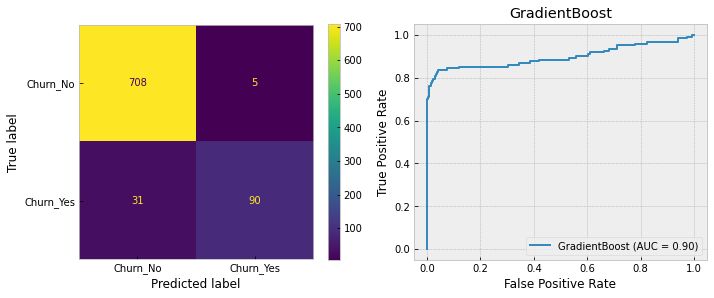

In [63]:
plotFigure(gbm, xtest, ytest, 'GradientBoost')
plt.title('GradientBoost');

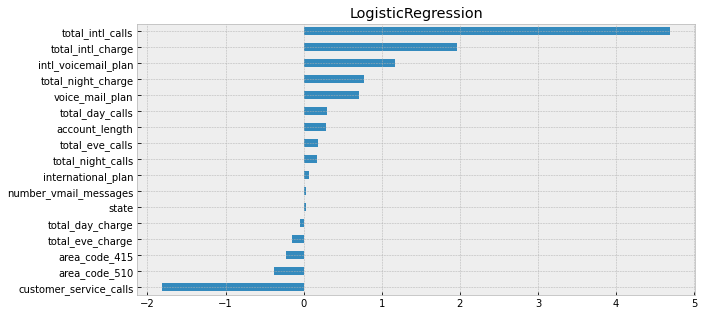

In [64]:
plt.figure(figsize=(10,5))
featureImportance(logreg_pl, xtest_lin, ytest_lin)

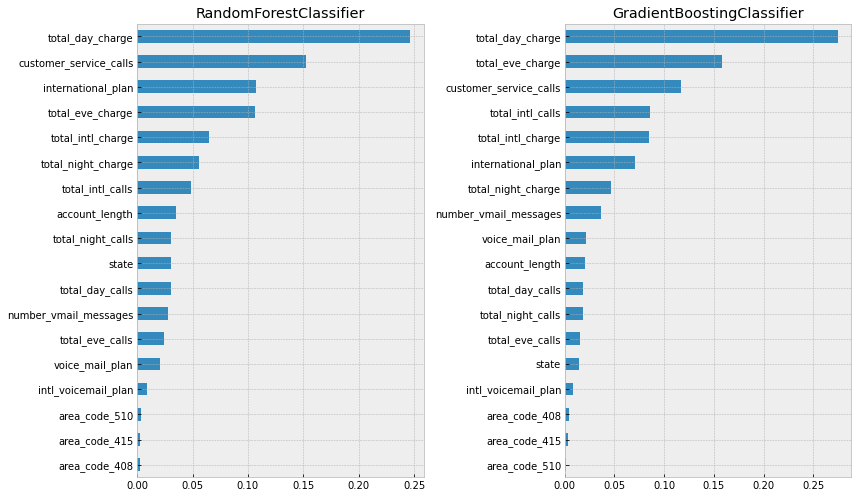

In [65]:
plt.figure(figsize=(12,7))
for i, model in enumerate([rf, gbm], start=1):
    plt.subplot(1,2,i)
    featureImportance(model, xtest, ytest)
plt.tight_layout(pad=1.)

In [66]:
gc.collect()

35257

<b>Ideas for Improvement</b>
1. More Feature Engineering may be done such as the total charges, total calls, total call minutes etc
2. For Logistic Regression, a higher order polynomial could be used